# Importing XDF files in HyPyP
@Author : [@jonasmago](https://github.com/jonasmago) & [@FranckPrts](https://github.com/FranckPrts).

Last updated: March 2023

This tutorial guides you in using the `XDF_IMPORT` class provided by [hypyp.io.py](https://github.com/ppsp-team/HyPyP/blob/master/hypyp/io.py).

[XDF files](https://github.com/sccn/xdf) are generally produced by [LSL](https://labstreaminglayer.readthedocs.io/index.html) when recording multi-stream time-series data generated in different modalities (e.g., EEG, video, audio). This open-source format enables associating extensive meta information. It is tailored for biosignal data (e.g., EEG, EOG, ECG, MEG) but still supports high sampling rate data (e.g., audio) or high-channel data (e.g., video, fMRI).

In this tutorial, we convert 2 streams from a sample XDF (containing 2 EEG streams and 4 video streams) into 2 `mne.Raw`.


## Imports

In [1]:
from hypyp.io import XDF_IMPORT

## Define path to XDF file(s)

In [ ]:
path_xdf = "../data/SAMPLE-XDF.xdf" #insert path to XDF file here

## The `XDF_IMPORT` class

The class has the following arguments:
- `path` : (str) Path to LSL data (i.e., XDF file). Can be absolute or relative. 
- `stream_idx` : (list) List of the stream index(es) in the XDF the user whish to import (must be of type "EEG"). By default, `None`. When set to `None`, `stream_idx` is appended the index of all streams of type `"EEG"`.
- `eeg_montage` (string) montage to apply to the eeg object that are converted. (all montages availables with mne can be found by running `mne.channels.get_builtin_montages()`)
- `sfreq` : (float) Sampling frequency, can either be set automatically by the class or given by the user.
- `print_stream_name` : (boolean) Wheather the class should print the stream and their respective index in the XDF. By default, `True`.
- `convert_all_eeg` : (boolean) Defines if the class must automatically look for stream(s) of `type="EEG"` and convert them. By default, `True`.
- `type` : (str) Define which type of stream the user is looking for. When converting EEG streams, or using  `convert_all_eeg=True`, the type must be set to "EEG". By default, `"EEG"`.

First, we instanciat the class naively with `print_stream_name=True` and `convert_all_eeg=False` to see what is inside our XDF. 

*We leave `sfreq` and `type` to their respective defaults so the class respectively determines the sampling rate and search for the EEG streams and their respective informations.*

In [ ]:
eeg = XDF_IMPORT(path_xdf, print_stream_name=True, convert_all_eeg=False)

**Great!** Now we know what our XDF is conposed of. Let's explore different ways of converting on or multiple EEG stream from it into `mne.Raw` object(s).

### 4 ways to use `IMPORT_XDF`


Here we look into 4 examples where we use `IMPORT_XDF` to convert the EEG streams into `mne.Raw`(s):
- **Situation 1:** The user wants to (blindly) **convert all** available EEG stream(s) in the XDF into `mne.Raw`(s)
- **Situation 2:** The user knows the index of **the one** EEG stream they want to convert
- **Situation 3:** The user knows the indexes of the **multiple** EEG streams they want to convert
- **Situation 4:** The user wants to convert EEG stream(s) using partial descriptions of the stream(s) of interest
    - **Situation 4.1:** With one stream
    - **Situation 4.2:** With two streams
    - **Situation 4.3:** With one stream, but the user first gives a vague description

#### Situation 1
The user wants to (blindly) **convert all** available EEG stream(s) in the XDF into `mne.Raw`(s).

In [ ]:
eeg = XDF_IMPORT(path_xdf, print_stream_name=False, convert_all_eeg=True)

In [ ]:
eeg.raw_all

#### Situation 2
The user knows the index of **the one** EEG stream they want to convert.

In [ ]:
eeg = XDF_IMPORT(path_xdf, stream_idx= [1], print_stream_name=False, convert_all_eeg=False)

In [ ]:
eeg.raw_all

#### Situation 3
The user knows the indexes of the **multiple** EEG streams they want to convert.

In [ ]:
eeg = XDF_IMPORT(path_xdf, stream_idx= [0, 1], print_stream_name=False, convert_all_eeg=False)

In [ ]:
eeg.raw_all

#### Situation 4
The user wants to convert EEG stream(s) using partial descriptions of the stream(s) of interest.

##### Situation 4.1
With one stream.

In [ ]:
eeg = XDF_IMPORT(path_xdf, stream_idx= ['SNS_082'], print_stream_name=False, convert_all_eeg=False)

In [ ]:
eeg.raw_all

##### Situation 4.2
With two streams.

In [ ]:
eeg = XDF_IMPORT(path_xdf, stream_idx= ['SNS_082', '1S_'], print_stream_name=False, convert_all_eeg=False)

In [ ]:
eeg.raw_all

##### Situation 4.3
With one stream only, but the user was not precise enough in their query so the class returned the two matching options.

The user has enter `SNS` which matches the name of two streams. The class returns the list of streams that matches the query:

In [ ]:
eeg = XDF_IMPORT(path_xdf, stream_idx= ['SNS'], print_stream_name=False, convert_all_eeg=False)

❗️XDF_IMPORT raised an `Exception`❗️

As the `Exception`'s message says, there is more than one stream that matched the partial name that we gave. To fix that, we'll re-run the class while specifying which stream(s) to import:

In [ ]:
eeg = XDF_IMPORT(path_xdf, stream_idx= ['81'], print_stream_name=False, convert_all_eeg=False)

In [ ]:
eeg.raw_all

## Extracting the XDF_IMPORT's output(s)

You can now find the `Raw` that were converted in the dictionary `eeg.raw_all`:

In [ ]:
eeg.raw_all

The name of the original XDF stream name is also stored in the `subject_info` dictionary nested in `Raw.Info`. So even if you separate a `Raw` from its key, you can still find the stream name's in its info.

In [ ]:
# Find the name of a stream converted mne (here the first one)
any_raw = list(eeg.raw_all.keys())[0] 

# Print the name of the first converted stream
print('Picked raw: {}'.format(any_raw))

# Extract the chosen Raw from the eeg.raw_all list
standalone_raw = eeg.raw_all[any_raw]

# Print the name of the stream from the Raw.info object itself
print('standalone_raw subject info: {}'.format(standalone_raw.info["subject_info"]['his_idstr']))

Here we also convert the stream in uV to V

In [ ]:
def convert_to_volts(x):
    return x / 1e6
eeg.raw_all["SNS_081S_N_EEG"].apply_function(convert_to_volts)

In [ ]:
eeg.raw_all["SNS_081S_N_EEG"].plot()

## Montage

**Careful!** 

`XDF_IMPORT` does not set the montage automatically! Now that we have converted our stream(s) to `mne.Raw` object(s), we can fix that by setting the montage following [mne's general instruction for setting montage](https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#about-montages-and-layouts). For example:

In [ ]:
# Set the montage to the standard 10-20 montage
eeg.raw_all['SNS_081S_N_EEG'].set_montage('standard_1020')

# Plot the sensors
eeg.raw_all['SNS_081S_N_EEG'].plot_sensors(show_names=True)

## Trying with 1st PPSP XDF file

In [ ]:
PPSP_path_xdf = '../data/2023-02-24_TEST_MARMOT.xdf'
eeg = XDF_IMPORT(PPSP_path_xdf, print_stream_name=True, convert_all_eeg=True)

In [ ]:
eeg.raw_all

In [ ]:
eeg.raw_all['EGI NetAmp 0-StreamIndex-9'].plot(scalings='auto')

In [ ]:
for i in eeg.data[8]['info'].keys():
    print(i, '\t—————\t', eeg.data[8]['info'][i])

## Trying with 2nd PPSP XDF file

In [2]:
PPSP_path_xdf = '../data/test_lsl_2eeg.xdf'
eeg = XDF_IMPORT(PPSP_path_xdf, print_stream_name=True, convert_all_eeg=True)

List of available stream(s):
	Stream EGI NetAmp 0 is at idx:0
	Stream EGI NetAmp 0 is at idx:1

Looking for EEG stream(s)
	Found EEG stream EGI NetAmp 0 at index: 0
	Found EEG stream EGI NetAmp 0 at index: 1

	--> Found 2 EEG stream(s) at index [0, 1]

Converting EEG stream(s) ... 
---! Carefull!
---! Multiple stream have the same name
---! Adding original streams' index as suffixes to the generated raws

---> Converting EGI NetAmp 0
sampling freq is 1000.0Hz
Creating RawArray with float64 data, n_channels=280, n_times=9920
    Range : 0 ... 9919 =      0.000 ...     9.919 secs
Ready.

---> Converting EGI NetAmp 0
sampling freq is 1000.0Hz
Creating RawArray with float64 data, n_channels=280, n_times=9920
    Range : 0 ... 9919 =      0.000 ...     9.919 secs
Ready.

Convertion done.


In [3]:
type(eeg.raw_all['EGI NetAmp 0-StreamIndex-0'])

mne.io.array.array.RawArray

In [ ]:
# Set montage here
eeg.raw_all['EGI NetAmp 0-StreamIndex-0'].set_montage()

Using matplotlib as 2D backend.


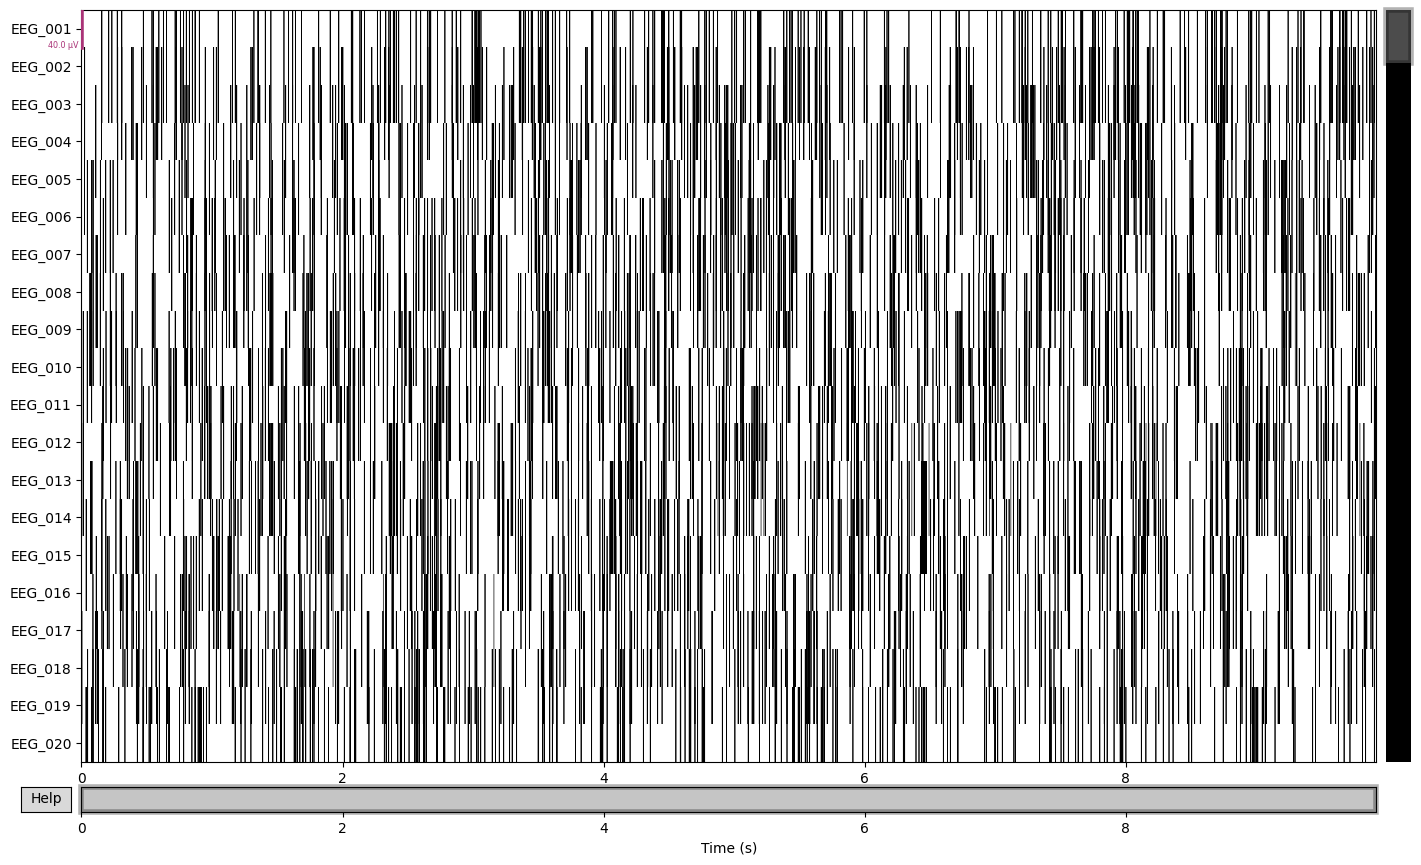

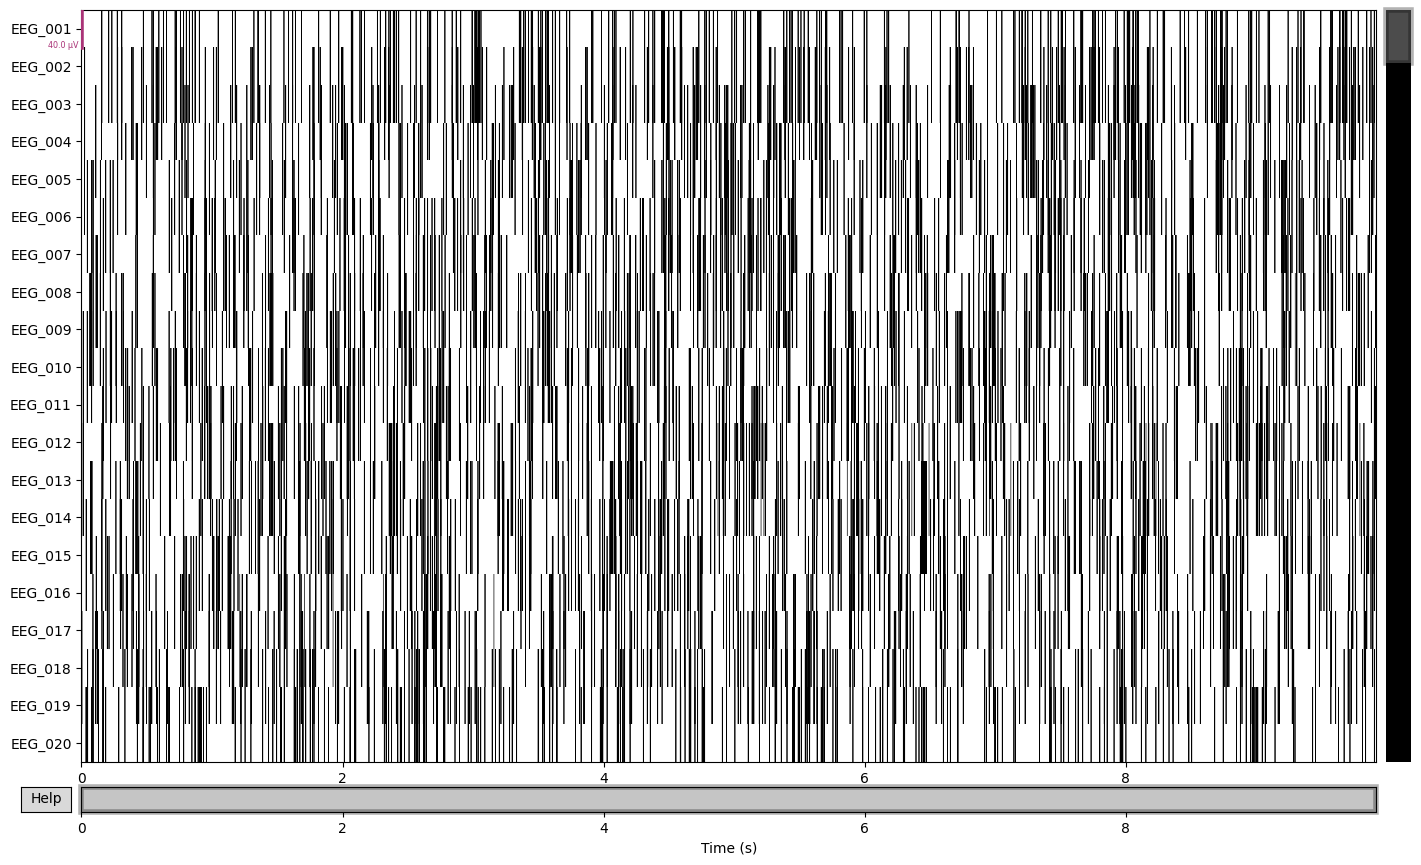

In [4]:
# Plot eeg
eeg.raw_all['EGI NetAmp 0-StreamIndex-0'].plot()

In [ ]:
# Plot eeg
eeg.raw_all['EGI NetAmp 0-StreamIndex-1'].plot()

## Trying with 3rd PPSP XDF file

In [2]:
PPSP_path_xdf = '../data/piloting_michael_phoebe.xdf'
eeg = XDF_IMPORT(PPSP_path_xdf, print_stream_name=True, convert_all_eeg=True)

List of available stream(s):
	Stream BBT-E32-AAB044_EEG_0 is at idx:0
	Stream BBT-E32-AAB033_EEG_0 is at idx:1

Looking for EEG stream(s)
	Found EEG stream BBT-E32-AAB033_EEG_0 at index: 1
	Found EEG stream BBT-E32-AAB044_EEG_0 at index: 0

	--> Found 2 EEG stream(s) at index [1, 0]

Converting EEG stream(s) ... 

---> Converting BBT-E32-AAB033_EEG_0
sampling freq is 256.0Hz
Creating RawArray with float64 data, n_channels=32, n_times=33664
    Range : 0 ... 33663 =      0.000 ...   131.496 secs
Ready.
[None]

---> Converting BBT-E32-AAB044_EEG_0
sampling freq is 256.0Hz
Creating RawArray with float64 data, n_channels=32, n_times=33664
    Range : 0 ... 33663 =      0.000 ...   131.496 secs
Ready.
[None]

Convertion done.


In [3]:
eeg.raw_all

{'BBT-E32-AAB033_EEG_0': <RawArray | 32 x 33664 (131.5 s), ~8.3 MB, data loaded>,
 'BBT-E32-AAB044_EEG_0': <RawArray | 32 x 33664 (131.5 s), ~8.3 MB, data loaded>}

Using matplotlib as 2D backend.


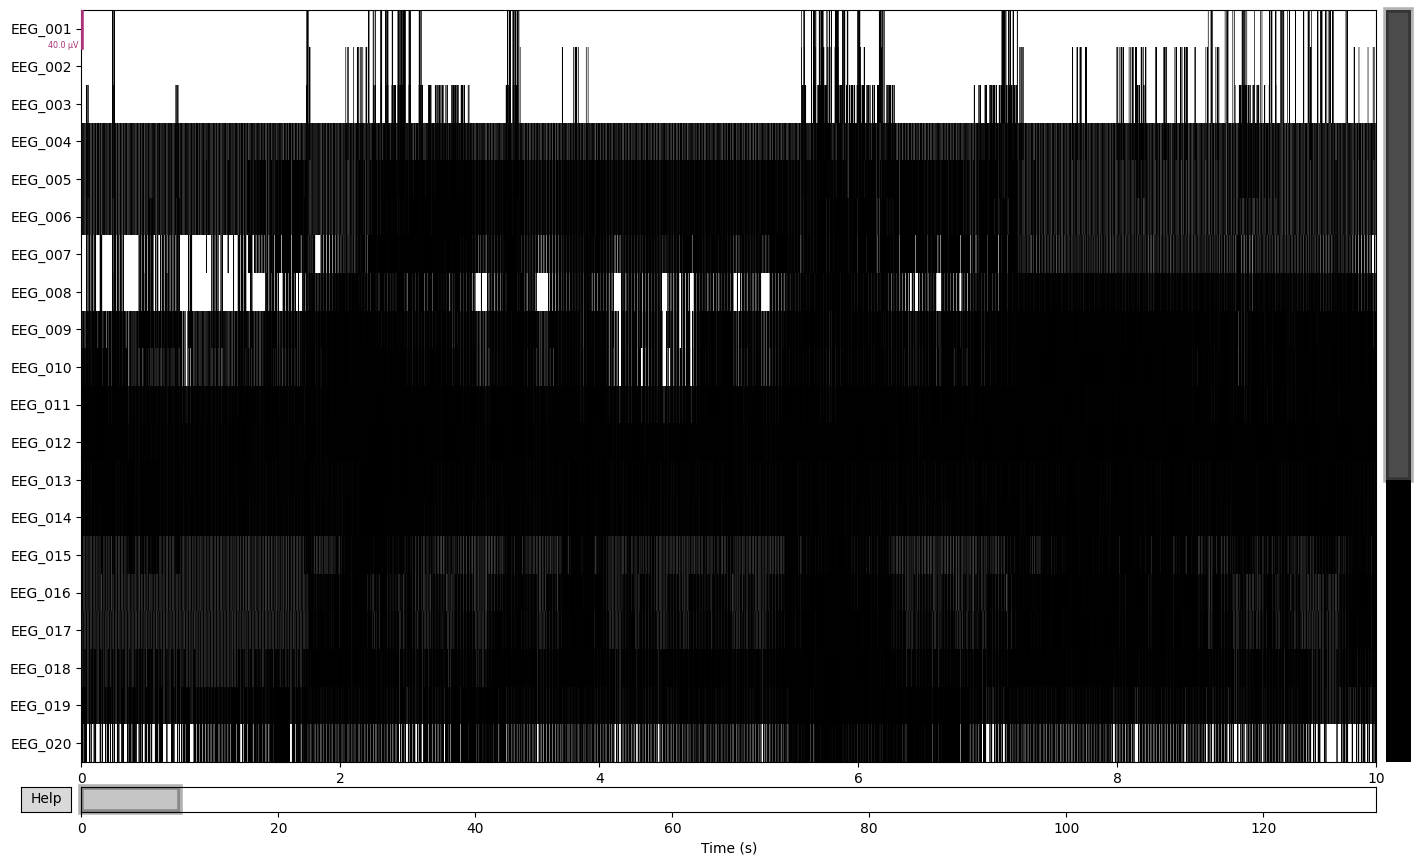

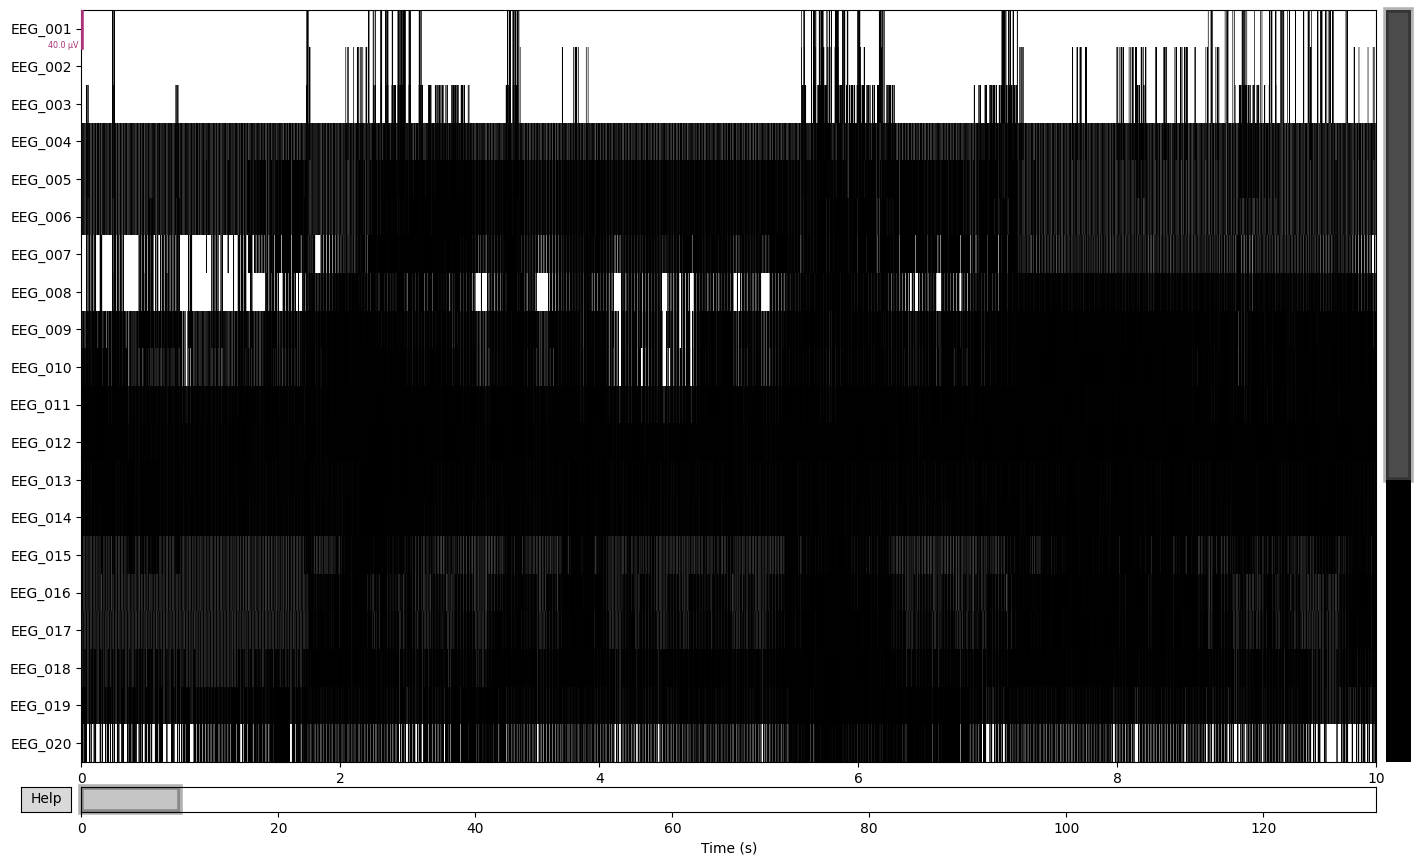

In [4]:
eeg.raw_all["BBT-E32-AAB033_EEG_0"].plot()

## Now with the XDF provided by MNE

In [ ]:
import mne
from mne.datasets import misc

MNE_path_xdf = (
    misc.data_path() / 'xdf' /
    'sub-P001_ses-S004_task-Default_run-001_eeg_a2.xdf')



# streams, header = pyxdf.load_xdf(fname)
# data = streams[0]["time_series"].T
# assert data.shape[0] == 5  # four raw EEG plus one stim channel
# data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
# data = data[::2]  # subselect
# data[:2] *= (1e-6 / 50 / 2)  # uV -> V and preamp gain
# sfreq = float(streams[0]["info"]["nominal_srate"][0])
# info = mne.create_info(3, sfreq, ["eeg", "eeg", "stim"])
# raw = mne.io.RawArray(data, info)
# raw.plot(scalings=dict(eeg=100e-6), duration=1, start=14)

In [ ]:
eeg = XDF_IMPORT(MNE_path_xdf, print_stream_name=True, convert_all_eeg=True)

In [ ]:
eeg.raw_all

In [ ]:
eeg.raw_all["actiCHamp-16080699"] = eeg.raw_all["actiCHamp-16080699"].apply_function(convert_to_volts)
eeg.raw_all['actiCHamp-16080699'].plot(scalings='auto')

## Conclusion
The XDF_IMPORT class can be used to import in `mne.Raw` format one or multiple EEG streams present in a XDF file at a time. These objects are then accessible in the `raw_all` list of the instantiated class, and their montage can be set from there following [mne's general instruction for setting montage](https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#about-montages-and-layouts).